# Ambient Assisted Living

Korrelation und Kovarianz sind zwei Maße, die beide die Beziehung zwischen zwei Variablen beschreiben. Der Hauptunterschied liegt jedoch darin, wie sie diese Beziehung quantifizieren und interpretieren. Hier eine Erklärung beider Konzepte und ihrer Unterschiede:

#### 1. Kovarianz
Die Kovarianz misst, wie zwei Variablen miteinander variieren. Sie gibt an, ob und in welchem Ausmaß die Werte der beiden Variablen in dieselbe Richtung tendieren.
    > Wenn die Kovarianz positiv ist, bedeutet das, dass beide Variablen dazu neigen, gleichzeitig zu steigen oder zu fallen.
    > Wenn die Kovarianz negativ ist, bedeutet das, dass eine Variable steigt, während die andere tendenziell sinkt.
    > Eine Kovarianz nahe null bedeutet, dass es keinen klaren Zusammenhang in den Richtungen der beiden Variablen gibt.
##### Beispiel
Stellen wir uns vor, wir betrachten das Einkommen und die Ausgaben verschiedener Personen. Wenn Menschen mit höherem Einkommen tendenziell auch höhere Ausgaben haben, wäre die Kovarianz positiv.
##### Problem
Die Kovarianz ist jedoch schwer interpretierbar, da sie stark von den Einheiten der beiden Variablen abhängt. Zum Beispiel führt eine Änderung der Maßeinheit (z. B. von Euro in Cent) zu einer Änderung des Kovarianzwerts, was den Vergleich zwischen verschiedenen Datenpaaren erschwert.
#### 2. Korrelation
Die Korrelation ist eine standardisierte Form der Kovarianz und misst die Stärke und Richtung der linearen Beziehung zwischen zwei Variablen auf einer Skala von -1 bis +1.

    > Ein Wert von +1 bedeutet eine perfekte positive lineare Beziehung: Wenn eine Variable steigt, steigt die andere im gleichen Verhältnis.
    > Ein Wert von -1 bedeutet eine perfekte negative lineare Beziehung: Wenn eine Variable steigt, sinkt die andere proportional.
    > Ein Wert von 0 bedeutet keine lineare Beziehung zwischen den beiden Variablen.

Die Korrelation wird berechnet, indem die Kovarianz durch das Produkt der Standardabweichungen der beiden Variablen geteilt wird. Dadurch wird sie einheitenunabhängig und besser vergleichbar.
##### Beispiel
Nehmen wir an, wir betrachten wieder Einkommen und Ausgaben. Eine Korrelation von +0,8 würde bedeuten, dass es eine starke positive lineare Beziehung gibt – höhere Einkommen sind tendenziell mit höheren Ausgaben verbunden, aber nicht perfekt.

|Merkmal	| Kovarianz	| Korrelation|
|-----------|-----------|------------|
|Wertebereich | Kann jede Zahl annehmen, abhängig von den Einheiten	| Zwischen -1 und +1
|Skalierung	| Hängt von den Einheiten der Variablen ab	| Unabhängig von den Einheiten, da standardisiert
|Interpretation	| Zeigt, ob und wie stark zwei Variablen gemeinsam variieren, jedoch ohne klare Skala | Misst die Stärke und Richtung der linearen Beziehung, einfach zu interpretieren
|Berechnung	| Durchschnitt der Produkte der Abweichungen der Variablen von ihrem Mittelwert	| Kovarianz geteilt durch das Produkt der Standardabweichungen der beiden Variablen

#### Zusammenfassend: Kovarianz zeigt eine grundsätzliche gemeinsame Tendenz auf, während die Korrelation diese Tendenz skaliert und eine Vergleichbarkeit ermöglicht.

#### Mittelwert                 $ \bar{x} = \frac{1}{n} \sum_{i=1}^{n} x_i $
#### Gewichteter Mittelwer      $ \bar{x}_w = \frac{\sum_{i=1}^{n} w_i x_i}{\sum_{i=1}^{n} w_i} $
#### geometrischer Mittelwert   $ \bar{x}_g = \left( \prod_{i=1}^{n} x_i \right)^{\frac{1}{n}} $
#### harmonischer Mittelwert    $ \bar{x}_h = \frac{n}{\sum_{i=1}^{n} \frac{1}{x_i}} $
### Pearson Korrelation Definiton $ r = \frac{ \sum_{i=1}^{n}(x_i-\bar{x})(y_i-\bar{y}) }{\sqrt{\sum_{i=1}^{n}(x_i-\bar{x})^2 \sum_{i=1}^{n}(y_i-\bar{y})^2}} $

#### IRIS Datensatz:

In [1]:
from IPython.display import display
import matplotlib.pyplot as plt
import pandas as pd

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


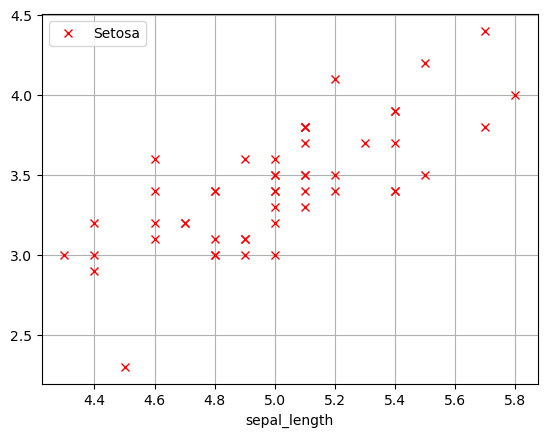

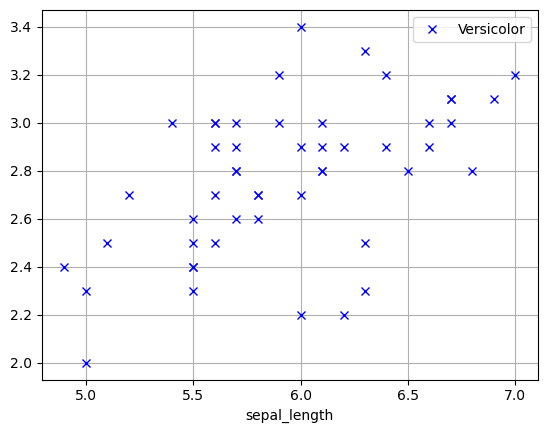

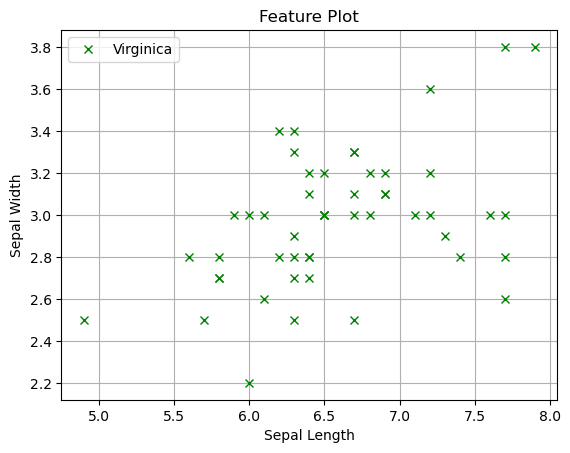

,sepal_length,sepal_width
sepal_length,1.000000,0.742547
sepal_width,0.742547,1.000000


,sepal_length,sepal_width
sepal_length,1.000000,0.525911
sepal_width,0.525911,1.000000


,sepal_length,sepal_width
sepal_length,1.000000,0.457228
sepal_width,0.457228,1.000000


In [23]:
data_dir = "../data/iris.csv"
df_iris = pd.read_csv(data_dir)
display(df_iris)

# Get subset data of species
df_setosa = df_iris[df_iris["species"] == "Setosa"]
df_versicolor = df_iris[df_iris["species"] == "Versicolor"]
df_virginica = df_iris[df_iris["species"] == "Virginica"]

# Plot features
df_setosa.plot(x="sepal_length", y="sepal_width", style="rx", label="Setosa")
plt.grid()

df_versicolor.plot(
    x="sepal_length", y="sepal_width", style="bx", label="Versicolor"
)
plt.grid()

df_virginica.plot(
    x="sepal_length", y="sepal_width", style="gx", label="Virginica"
)

plt.legend(loc="best")
plt.title("Feature Plot")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.grid()
plt.show()

# Correlation of features
# df_setosa.corr(method="pearson", numeric_only=True)

data_setosa = {
    "sepal_length": df_setosa["sepal_length"],
    "sepal_width": df_setosa["sepal_width"],
}

data_versicolor = {
    "sepal_length": df_versicolor["sepal_length"],
    "sepal_width": df_versicolor["sepal_width"],
}

data_virginica = {
    "sepal_length": df_virginica["sepal_length"],
    "sepal_width": df_virginica["sepal_width"],
}

# display(data_setosa)

df_setosa_features = pd.DataFrame(data_setosa)
display(df_setosa_features.corr(method="pearson"))

df_versicolor_features = pd.DataFrame(data_versicolor)
display(df_versicolor_features.corr(method="pearson"))

df_virginica_features = pd.DataFrame(data_virginica)
display(df_virginica_features.corr(method="pearson"))